## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.720425  1.558744  0.647667 -1.269360  0.483738 -0.274522
1 -1.796707 -0.456653  0.915159 -0.420118  0.661729 -1.336577
2 -1.669023 -0.162197  0.759985 -0.947040  1.611609 -1.311774
3 -0.728724  1.282032 -0.775527  0.733729 -0.685036  0.612992
4  0.742972  1.147821 -1.418835 -0.213157 -1.013121  0.942790


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0135865	total: 57.8ms	remaining: 57.7s
1:	learn: 1.0048441	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9974237	total: 59ms	remaining: 19.6s
3:	learn: 0.9873486	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9781966	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9704118	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9605484	total: 60.6ms	remaining: 8.6s
7:	learn: 0.9527157	total: 61ms	remaining: 7.57s
8:	learn: 0.9443769	total: 61.5ms	remaining: 6.77s
9:	learn: 0.9359076	total: 61.9ms	remaining: 6.13s
10:	learn: 0.9291076	total: 62.3ms	remaining: 5.6s
11:	learn: 0.9183679	total: 62.8ms	remaining: 5.17s
12:	learn: 0.9076332	total: 63.4ms	remaining: 4.81s
13:	learn: 0.9010205	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8944494	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8875393	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8774109	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8692934	total: 66.1ms	remaining: 3.61s
18:	learn: 0.8613192	total: 66.6ms	remaining: 3.44s

106:	learn: 0.4320307	total: 107ms	remaining: 895ms
107:	learn: 0.4290560	total: 108ms	remaining: 891ms
108:	learn: 0.4256232	total: 108ms	remaining: 886ms
109:	learn: 0.4228761	total: 109ms	remaining: 881ms
110:	learn: 0.4207693	total: 109ms	remaining: 875ms
111:	learn: 0.4188286	total: 110ms	remaining: 870ms
112:	learn: 0.4159774	total: 110ms	remaining: 864ms
113:	learn: 0.4128284	total: 111ms	remaining: 859ms
114:	learn: 0.4100374	total: 111ms	remaining: 853ms
115:	learn: 0.4065986	total: 111ms	remaining: 848ms
116:	learn: 0.4036546	total: 112ms	remaining: 844ms
117:	learn: 0.4008086	total: 112ms	remaining: 840ms
118:	learn: 0.3985040	total: 113ms	remaining: 837ms
119:	learn: 0.3958833	total: 114ms	remaining: 833ms
120:	learn: 0.3932598	total: 114ms	remaining: 828ms
121:	learn: 0.3902359	total: 115ms	remaining: 825ms
122:	learn: 0.3883346	total: 115ms	remaining: 820ms
123:	learn: 0.3859410	total: 116ms	remaining: 817ms
124:	learn: 0.3835027	total: 116ms	remaining: 813ms
125:	learn: 

260:	learn: 0.1592270	total: 189ms	remaining: 536ms
261:	learn: 0.1580656	total: 190ms	remaining: 536ms
262:	learn: 0.1572304	total: 191ms	remaining: 535ms
263:	learn: 0.1561857	total: 191ms	remaining: 533ms
264:	learn: 0.1554124	total: 192ms	remaining: 532ms
265:	learn: 0.1544232	total: 192ms	remaining: 530ms
266:	learn: 0.1533919	total: 193ms	remaining: 529ms
267:	learn: 0.1525171	total: 193ms	remaining: 527ms
268:	learn: 0.1513436	total: 193ms	remaining: 526ms
269:	learn: 0.1503390	total: 194ms	remaining: 525ms
270:	learn: 0.1492863	total: 194ms	remaining: 523ms
271:	learn: 0.1484226	total: 195ms	remaining: 522ms
272:	learn: 0.1476250	total: 195ms	remaining: 521ms
273:	learn: 0.1467527	total: 196ms	remaining: 519ms
274:	learn: 0.1458645	total: 197ms	remaining: 519ms
275:	learn: 0.1449928	total: 197ms	remaining: 517ms
276:	learn: 0.1440707	total: 198ms	remaining: 516ms
277:	learn: 0.1432125	total: 198ms	remaining: 515ms
278:	learn: 0.1422698	total: 199ms	remaining: 514ms
279:	learn: 

457:	learn: 0.0635869	total: 290ms	remaining: 344ms
458:	learn: 0.0631484	total: 291ms	remaining: 343ms
459:	learn: 0.0630603	total: 291ms	remaining: 342ms
460:	learn: 0.0626313	total: 292ms	remaining: 341ms
461:	learn: 0.0623666	total: 292ms	remaining: 341ms
462:	learn: 0.0620116	total: 293ms	remaining: 340ms
463:	learn: 0.0615947	total: 294ms	remaining: 339ms
464:	learn: 0.0615102	total: 294ms	remaining: 338ms
465:	learn: 0.0612547	total: 295ms	remaining: 337ms
466:	learn: 0.0609106	total: 295ms	remaining: 337ms
467:	learn: 0.0604943	total: 296ms	remaining: 336ms
468:	learn: 0.0601322	total: 296ms	remaining: 335ms
469:	learn: 0.0598087	total: 296ms	remaining: 334ms
470:	learn: 0.0594156	total: 297ms	remaining: 333ms
471:	learn: 0.0593352	total: 297ms	remaining: 333ms
472:	learn: 0.0590949	total: 298ms	remaining: 332ms
473:	learn: 0.0587497	total: 298ms	remaining: 331ms
474:	learn: 0.0583068	total: 299ms	remaining: 330ms
475:	learn: 0.0578717	total: 299ms	remaining: 330ms
476:	learn: 

613:	learn: 0.0336245	total: 373ms	remaining: 234ms
614:	learn: 0.0334534	total: 373ms	remaining: 234ms
615:	learn: 0.0334294	total: 374ms	remaining: 233ms
616:	learn: 0.0333063	total: 374ms	remaining: 232ms
617:	learn: 0.0331827	total: 374ms	remaining: 231ms
618:	learn: 0.0330346	total: 375ms	remaining: 231ms
619:	learn: 0.0329100	total: 376ms	remaining: 230ms
620:	learn: 0.0327932	total: 376ms	remaining: 229ms
621:	learn: 0.0326730	total: 376ms	remaining: 229ms
622:	learn: 0.0325552	total: 377ms	remaining: 228ms
623:	learn: 0.0324415	total: 377ms	remaining: 227ms
624:	learn: 0.0323290	total: 378ms	remaining: 227ms
625:	learn: 0.0321872	total: 378ms	remaining: 226ms
626:	learn: 0.0320745	total: 379ms	remaining: 225ms
627:	learn: 0.0319242	total: 379ms	remaining: 225ms
628:	learn: 0.0317648	total: 380ms	remaining: 224ms
629:	learn: 0.0316184	total: 380ms	remaining: 223ms
630:	learn: 0.0315192	total: 381ms	remaining: 223ms
631:	learn: 0.0313645	total: 381ms	remaining: 222ms
632:	learn: 

803:	learn: 0.0177362	total: 475ms	remaining: 116ms
804:	learn: 0.0176898	total: 476ms	remaining: 115ms
805:	learn: 0.0176775	total: 476ms	remaining: 115ms
806:	learn: 0.0176307	total: 476ms	remaining: 114ms
807:	learn: 0.0175846	total: 477ms	remaining: 113ms
808:	learn: 0.0174959	total: 477ms	remaining: 113ms
809:	learn: 0.0174873	total: 478ms	remaining: 112ms
810:	learn: 0.0174485	total: 478ms	remaining: 111ms
811:	learn: 0.0174400	total: 478ms	remaining: 111ms
812:	learn: 0.0173532	total: 479ms	remaining: 110ms
813:	learn: 0.0173449	total: 479ms	remaining: 110ms
814:	learn: 0.0173006	total: 480ms	remaining: 109ms
815:	learn: 0.0172160	total: 480ms	remaining: 108ms
816:	learn: 0.0171774	total: 481ms	remaining: 108ms
817:	learn: 0.0171332	total: 481ms	remaining: 107ms
818:	learn: 0.0170892	total: 482ms	remaining: 107ms
819:	learn: 0.0170064	total: 482ms	remaining: 106ms
820:	learn: 0.0169261	total: 483ms	remaining: 105ms
821:	learn: 0.0168509	total: 483ms	remaining: 105ms
822:	learn: 

986:	learn: 0.0104946	total: 556ms	remaining: 7.33ms
987:	learn: 0.0104454	total: 557ms	remaining: 6.76ms
988:	learn: 0.0104185	total: 557ms	remaining: 6.2ms
989:	learn: 0.0103828	total: 558ms	remaining: 5.63ms
990:	learn: 0.0103434	total: 558ms	remaining: 5.07ms
991:	learn: 0.0102955	total: 559ms	remaining: 4.51ms
992:	learn: 0.0102851	total: 559ms	remaining: 3.94ms
993:	learn: 0.0102503	total: 559ms	remaining: 3.38ms
994:	learn: 0.0102105	total: 560ms	remaining: 2.81ms
995:	learn: 0.0101848	total: 560ms	remaining: 2.25ms
996:	learn: 0.0101596	total: 561ms	remaining: 1.69ms
997:	learn: 0.0101284	total: 561ms	remaining: 1.12ms
998:	learn: 0.0100718	total: 562ms	remaining: 562us
999:	learn: 0.0100163	total: 562ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

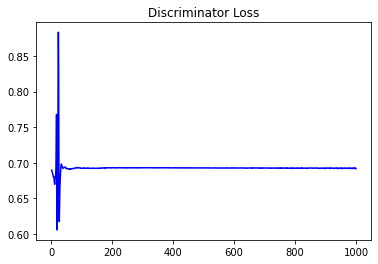

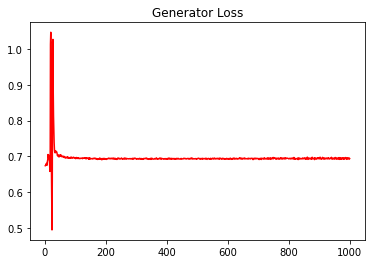

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1922917615077465


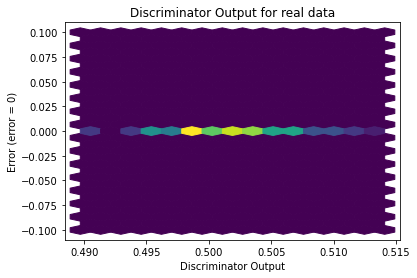

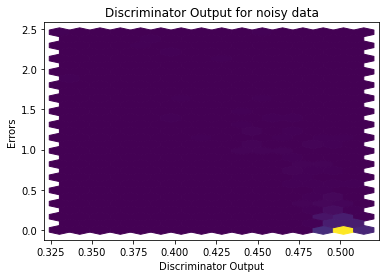

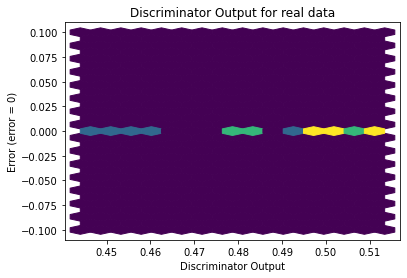

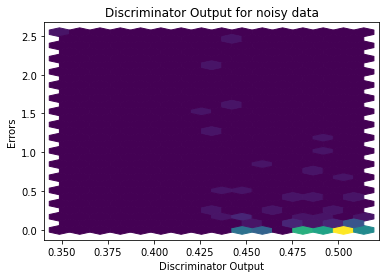

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


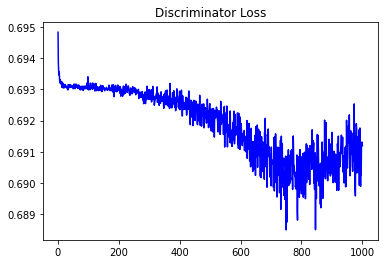

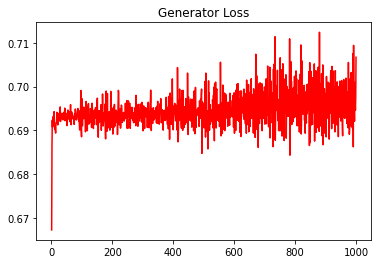

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1202387802439366


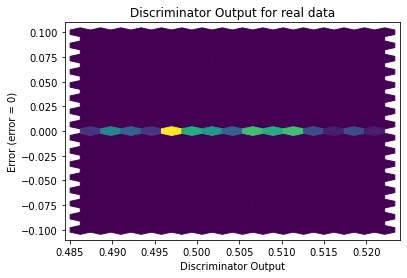

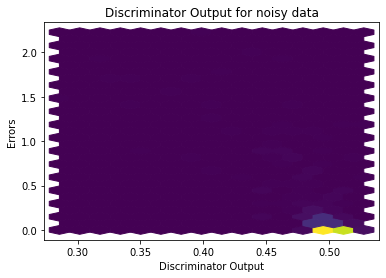

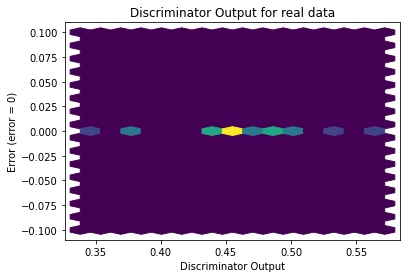

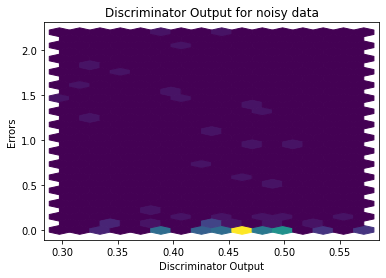

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1473]], requires_grad=True)
